# Dejunkifying a Plot

Nesta palestra, quero orientá-lo no processo de obter um gráfico regular do Matplotlib e aplicar os princípios de proporção de tinta de dados e lixo gráfico de Tufte para torná-lo um pouco melhor. Vou percorrer todas as etapas usando os notebooks Jupyter e você pode acompanhar.

Mas se você quiser um pouco mais de desafio, incluirei questionários em vídeo ao longo do caminho, solicitando que você resolva o problema antes de abordá-lo.

Vamos começar -- Usaremos um gráfico de dados sobre a popularidade das linguagens de programação do Stack Overflow para o ano de 2016.

Veja os dados aqui: [http://stackoverflow.com/research/developer-survey-2016#most-popular-technologies-per-occupation](http://stackoverflow.com/research/developer-survey-2016#most-popular-technologies-per-occupation)

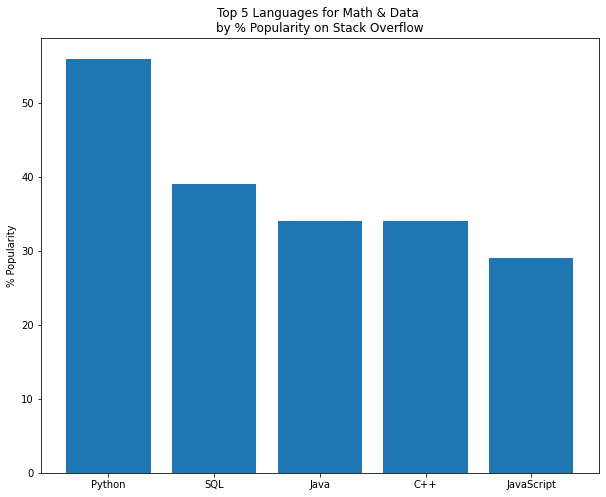

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Here there are five different languages,
# Python, SQL, Java, C++, and JavaScript.
# We'll find their positions as a rank
# using NumPy as a range function.
# And here are the popularity
# values from Stack Overflow.
languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# We'll create a bar chart based on rank and
# popularity, then add x and y ticks and
# set a title.
plt.figure(figsize=(10, 8));
plt.bar(pos, popularity, align='center');
plt.xticks(pos, languages);
plt.ylabel('% Popularity');
plt.title('Top 5 Languages for Math & Data \nby % Popularity on Stack Overflow');

Ok, aqui está o primeiro desafio - nosso enredo tem essa moldura, mas não é realmente necessário e parece um pouco pesado.

Vamos remover essa tinta. Isso é um pouco mais complicado, mas podemos obter o eixo atual e iterar por toda a coluna vertebral, definindo sua visibilidade como falsa.

Isso já fará com que o gráfico pareça muito mais leve.

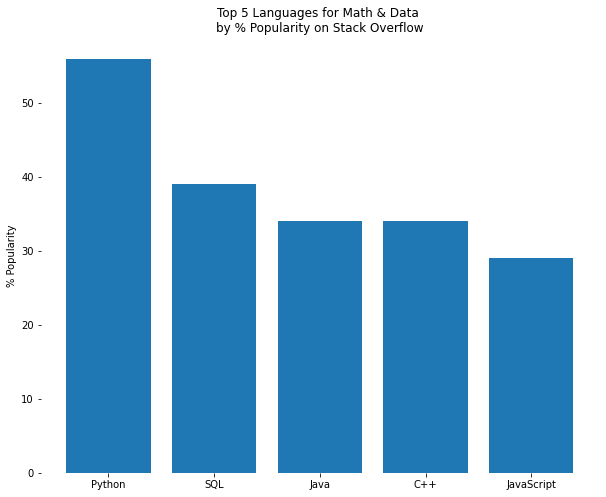

In [2]:
import matplotlib.pyplot as plt
import numpy as np

languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.figure(figsize=(10, 8));
plt.bar(pos, popularity, align='center');
plt.xticks(pos, languages);
plt.ylabel('% Popularity');
plt.title('Top 5 Languages for Math & Data \nby % Popularity on Stack Overflow');

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

Agora, o azul está bom, mas não nos ajuda a diferenciar as barras em nada. Que tal suavizarmos todos os pretos duros para cinza e depois mudarmos as cores da barra para cinza também?

Além disso, vamos manter a barra do Python com a mesma cor azul que era originalmente para destacá-la.

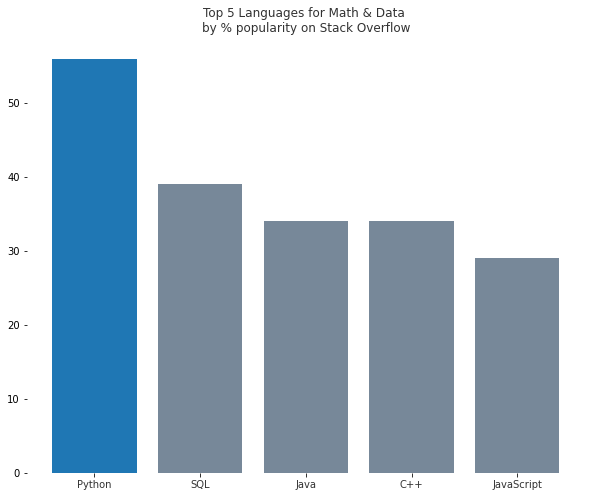

In [3]:
plt.figure(figsize=(10, 8));
languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# There are several different ways that we could do this.
# The way I chose was to add an alpha parameter to everything,
# which adds a bit of transparency and softens the colors up a bit.
# I also set the bars themselves to a neutral gray color then chose
# a nice blue from the Python website to accentuate the first bar.

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# change one bar, the python bar, to a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# set the title
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

Agora vamos corrigir o eixo y removendo os rótulos e apenas rotulando diretamente as barras individuais.

Na verdade, não precisamos do rótulo do eixo y, pois o título nos diz tudo o que precisamos saber sobre as unidades neste gráfico.

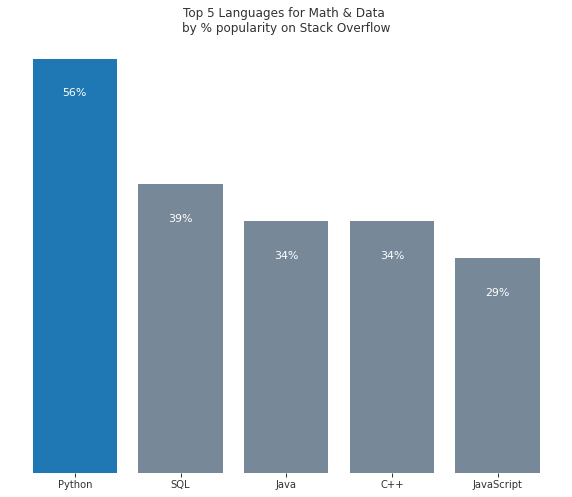

In [4]:
plt.figure(figsize=(10, 8));
languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
bars[0].set_color('#1F77B4')

plt.xticks(pos, languages, alpha=0.8)

# We can remove the y label by just setting it to an empty list
plt.yticks([])

plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Removing the label is easy, but changing
# the bars is a little bit of a pain.
# For this we want to iterate over each
# of the bars and grab its height.
# Then we want to create a new text
# object with the data information.
for bar in bars:
    # Unfortunately, this means doing
    # a little bit of playing with padding.
    # Here I'll set up the x location to the bar
    # x plus the width divided by two and
    # the y location to be
    # the bar height minus five.

    # It might seem weird to get the middle
    # of the bar in the x dimension, but
    # that's because I'm setting the label
    # to center itself, horizontally.

    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, str(int(height)) + '%',
                   ha='center', color='w', fontsize=11)

E isso é tudo. Uma série simples de etapas para tornar seus gráficos de barras um pouco mais utilizáveis.

Ao assistir a este vídeo, você encontrou uma maneira diferente de fazer as coisas? Talvez outros elementos de Tufte ou Cairo que você acha que poderiam ser usados para tornar isso mais legível?

Sinta-se à vontade para entrar nos fóruns de discussão e compartilhá-los comigo e com seus colegas.